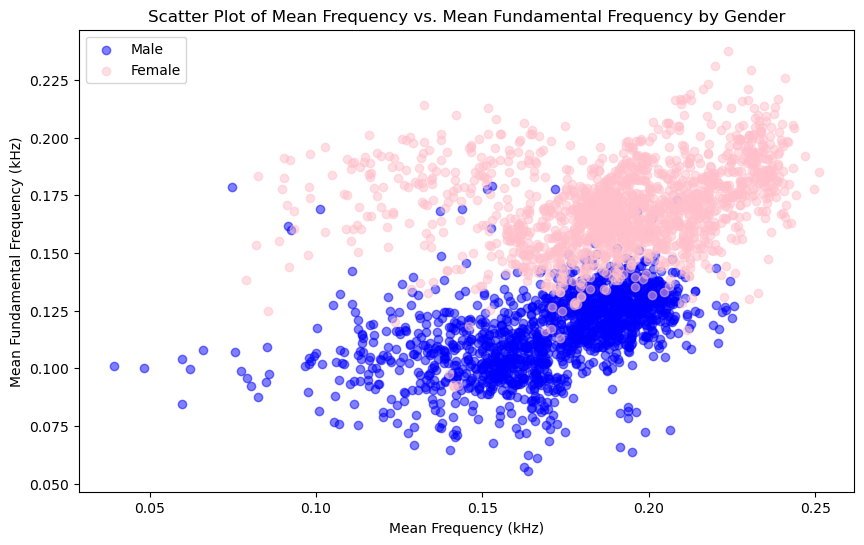

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn (make_moons)

df = pd.read_csv('/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/gender_voice.csv', delimiter=',')
df.dataframeName = 'gender voice.csv'

male = df[df['label'] == 'male']
female = df[df['label'] == 'female']

plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(male['meanfreq'], male['meanfun'], color='blue', label='Male', alpha=0.5)
plt.scatter(female['meanfreq'], female['meanfun'], color='pink', label='Female', alpha=0.5)
# Adding axis labels
plt.xlabel('Mean Frequency (kHz)')
plt.ylabel('Mean Fundamental Frequency (kHz)')

# Adding a plot title
plt.title('Scatter Plot of Mean Frequency vs. Mean Fundamental Frequency by Gender')

# Adding a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

NameError: name 'model_selection' is not defined

In [26]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2122, 20)
Test shape: (1046, 20)


In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

|--- meanfun <= 0.14
|   |--- IQR <= 0.07
|   |   |--- sfm <= 0.20
|   |   |   |--- class: male
|   |   |--- sfm >  0.20
|   |   |   |--- class: female
|   |--- IQR >  0.07
|   |   |--- meanfun <= 0.13
|   |   |   |--- class: male
|   |   |--- meanfun >  0.13
|   |   |   |--- class: male
|--- meanfun >  0.14
|   |--- meanfun <= 0.15
|   |   |--- IQR <= 0.07
|   |   |   |--- class: female
|   |   |--- IQR >  0.07
|   |   |   |--- class: male
|   |--- meanfun >  0.15
|   |   |--- centroid <= 0.08
|   |   |   |--- class: male
|   |   |--- centroid >  0.08
|   |   |   |--- class: female
 



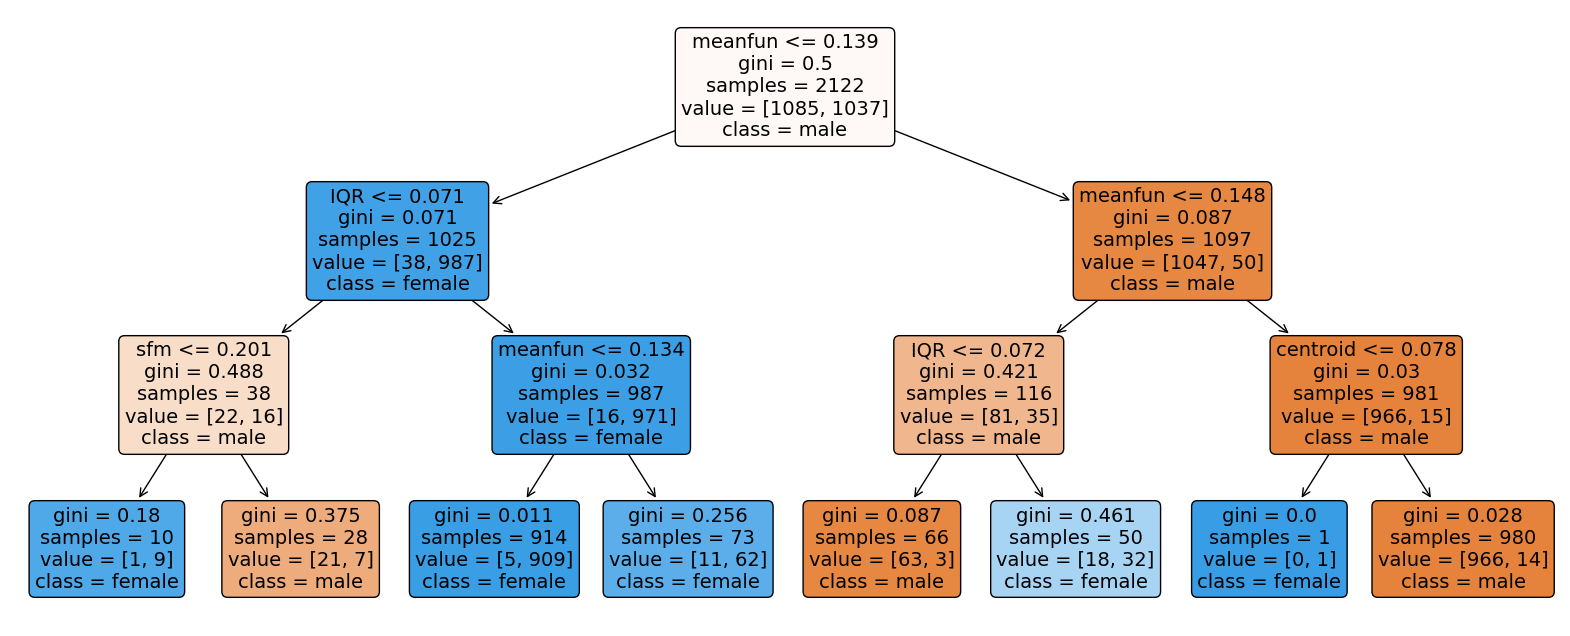

In [28]:
# Assuming your DataFrame `df` has all features as columns except the last one which is the target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target column

# Now get the feature names from the DataFrame
feature_names = X.columns.tolist()


# Generate tree rules
tree_rules = export_text(decision_tree, feature_names=feature_names)
print(tree_rules, "\n")

# Plot the tree
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
              feature_names=feature_names,
              class_names=["male", "female"],
              rounded=True,
              filled=True, 
              fontsize=14)
plt.show()

|--- x_12 <= 0.14
|   |--- x_5 <= 0.07
|   |   |--- x_9 <= 0.20
|   |   |   |--- class: male
|   |   |--- x_9 >  0.20
|   |   |   |--- class: female
|   |--- x_5 >  0.07
|   |   |--- x_12 <= 0.13
|   |   |   |--- class: male
|   |   |--- x_12 >  0.13
|   |   |   |--- class: male
|--- x_12 >  0.14
|   |--- x_12 <= 0.15
|   |   |--- x_5 <= 0.07
|   |   |   |--- class: female
|   |   |--- x_5 >  0.07
|   |   |   |--- class: male
|   |--- x_12 >  0.15
|   |   |--- x_11 <= 0.08
|   |   |   |--- class: male
|   |   |--- x_11 >  0.08
|   |   |   |--- class: female
 



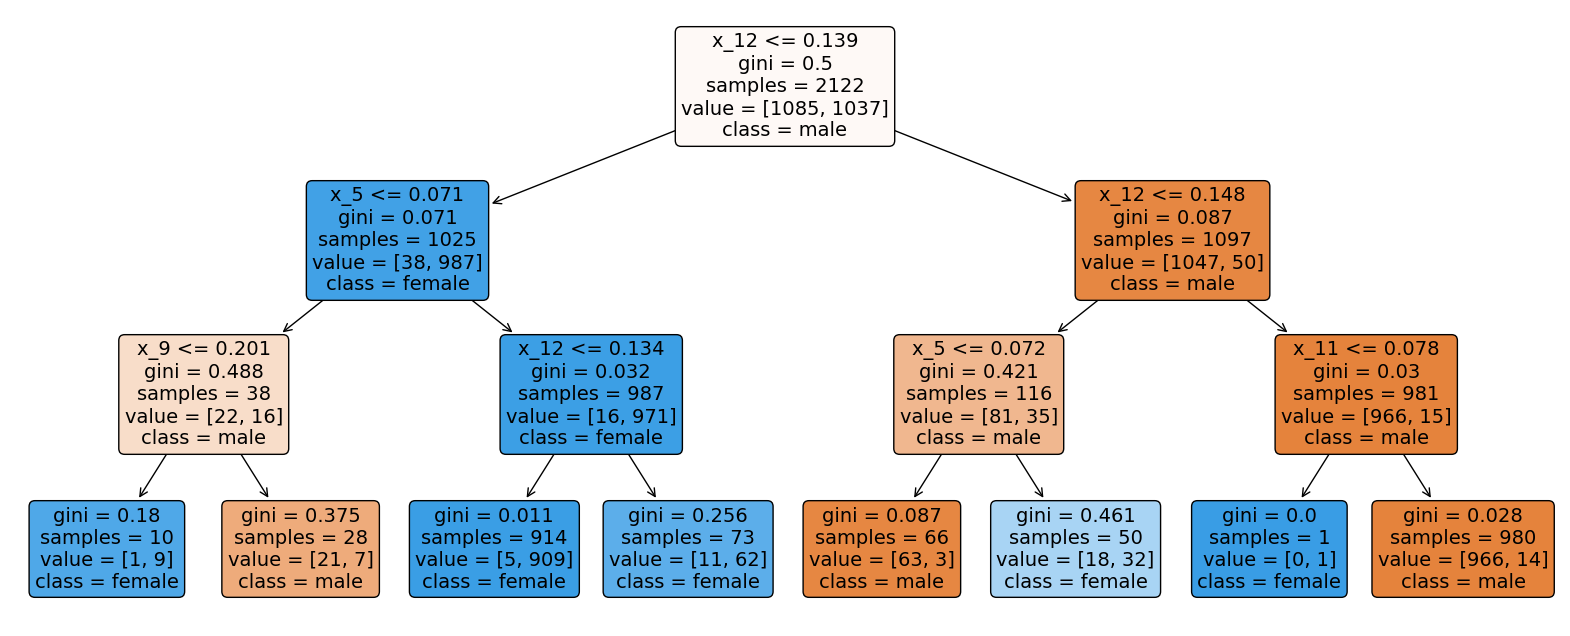

In [20]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

# Example feature names for 20 features
feature_names = [f"x_{i}" for i in range(20)]

# Generate tree rules
tree_rules = export_text(decision_tree, feature_names=feature_names)
print(tree_rules, "\n")

# Plot the tree
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
              feature_names=feature_names,
              class_names=["male", "female"],
              rounded=True,
              filled=True, 
              fontsize=14)
plt.show()

plt.show()

|--- meanfun <= 0.14
|   |--- IQR <= 0.07
|   |   |--- meanfun <= 0.13
|   |   |   |--- sfm <= 0.44
|   |   |   |   |--- dfrange <= 0.41
|   |   |   |   |   |--- class: female
|   |   |   |   |--- dfrange >  0.41
|   |   |   |   |   |--- dfrange <= 7.40
|   |   |   |   |   |   |--- class: male
|   |   |   |   |   |--- dfrange >  7.40
|   |   |   |   |   |   |--- class: female
|   |   |   |--- sfm >  0.44
|   |   |   |   |--- dfrange <= 4.09
|   |   |   |   |   |--- class: female
|   |   |   |   |--- dfrange >  4.09
|   |   |   |   |   |--- dfrange <= 6.63
|   |   |   |   |   |   |--- class: male
|   |   |   |   |   |--- dfrange >  6.63
|   |   |   |   |   |   |--- class: female
|   |   |--- meanfun >  0.13
|   |   |   |--- mode <= 0.20
|   |   |   |   |--- modindx <= 0.05
|   |   |   |   |   |--- class: male
|   |   |   |   |--- modindx >  0.05
|   |   |   |   |   |--- meanfun <= 0.13
|   |   |   |   |   |   |--- sp.ent <= 0.90
|   |   |   |   |   |   |   |--- class: female
|   |   |  